# EigenFaces

In [2]:
import numpy as np 
import imageio
import os

Dữ liệu: [ATT Faces](http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html)<br>
Gồm 10 hình ảnh khuôn mặt của 40 người, mỗi hình ảnh có kích thước 112x92

In [3]:
path = r'att_faces/' # path to the database 
ids = range(1, 41) # 40 persons
surfix = '.pgm'

h = 112 # hight 
w = 92 # width
D = h * w #total dimensions
N = 40*10 #number of person * image per person 

X = np.zeros((D, N))
Y = np.zeros(N)

Dữ liệu X được lưu dưới dạng ma trận kích thước 10304x400, với 10304 là số chiều của một hình ảnh được chuyển từ ma trận 112xx92 sang vector một chiều<br>
Mỗi cột của X là một điểm dữ liệu

In [4]:
cnt = 0 
for person_id in range(1, 41):
    personFoldername = 's' + str(person_id)
    for image_id in range(1, 11):
        filename = os.path.join(path, personFoldername, str(image_id) + surfix)
        
        X[:, cnt] = imageio.imread(filename).reshape(D)
        Y[cnt] = person_id
        cnt += 1 

In [5]:
# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA
k = 300
pca = PCA(n_components=k) 
pca.fit(X.T)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
# projection matrix 
U = pca.components_.T

In [ ]:
Một vài eigenfaces

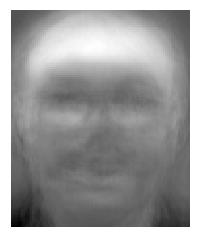

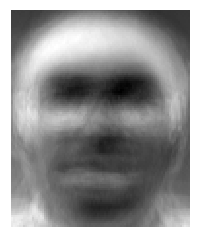

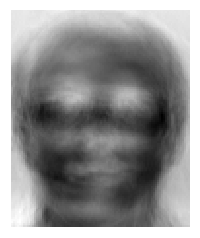

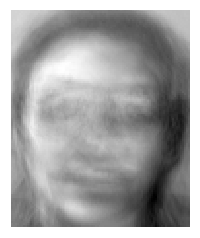

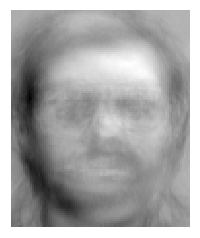

In [16]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
#     f2 = plt.imshow(, interpolation='nearest' )
    plt.gray()
    fn = 'eigenface' + str(i).zfill(2) + '.png'
#     plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()
    


Tái tạo khuôn mặt của 6 người đầu tiên dựa vào các eigenfaces đã tìm được ở trên<br>
Kết quả là bao gồm một hình khuôn mặt gốc và một hình đã được tái tạo tương ứng

Person  1


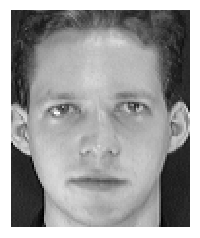

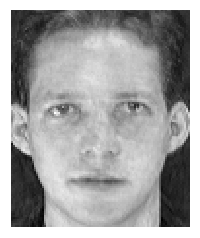

Person  2


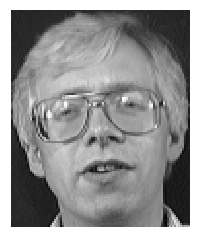

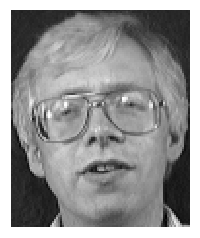

Person  3


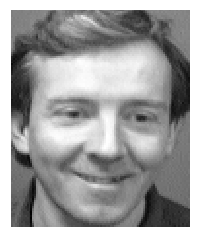

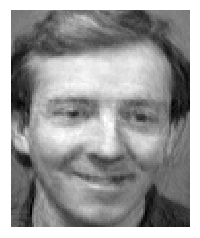

Person  4


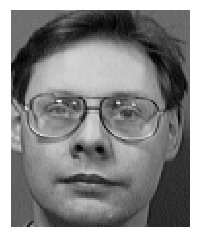

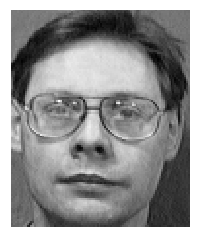

Person  5


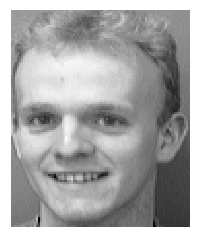

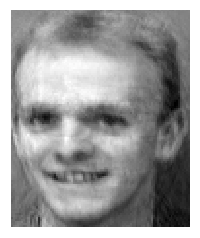

Person  6


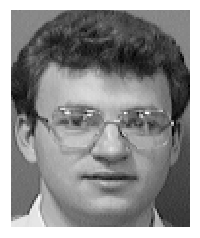

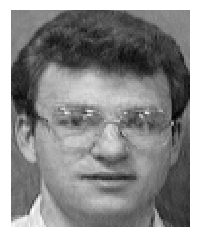

In [15]:
# See reconstruction of first 6 persons at 6th image
image_id = 1
for person_id in range(1, 7):
    print("Person ", person_id)
    fn = os.path.join(path, 's' + str(person_id), str(image_id) + surfix)
    im = imageio.imread(fn)
    plt.axis('off')

    f1 = plt.imshow(im, interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    plt.gray()
    fn = os.path.join('ori', str(person_id) + '.png')
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()
    # reshape and subtract mean,
    x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
    # encode
    z = U.T.dot(x) #U: 10304 x 300, x: 10304 x 1, => z = 300x1
    #decode
    x_tilde = U.dot(z) + pca.mean_.reshape(D, 1) #U: 10304 x 300, z = 300x1 => x_tilde: 10304 x 1

    # reshape to orginal dim
    im_tilde = x_tilde.reshape(h, w)
    plt.axis('off')

    f1 = plt.imshow(im_tilde, interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    plt.gray()
    fn = 'res' + str(person_id).zfill(2) + '.png'
#         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    plt.show()